In [191]:
# <!-- collapse=True -->
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Courbe de Hilbert

Possibilié de pavage du plan par une ligne continue, respectant la localité. Algorithme de construction des coordonées.


https://fr.wikipedia.org/wiki/Courbe_de_Hilbert

Utilisation pour la visualisation de fichier... 

https://corte.si/posts/visualisation/binvis/index.html

Algorithme:
* Recursif
* Division en quadrant : Nord-Est, Nord-Ouest, Sud-Est, Sud-Ouest

In [3]:
'''
C: Clock-wise
A: Anti-clockwise

'''

def getCoordinates(k, level, sens='C', start='NO' ):
    s = {}
    s['A'] = ['C', 'A', 'A', 'C' ]
    s['C'] = ['A', 'C', 'C', 'A' ]
    
    coords = {}
    coords['SO'] = {'A':[(0,0), (1,0), (1,1), (0,1) ], 'C':[(0,0), (0,1), (1,1), (1,0) ]}
    coords['SE'] = {'A':[(0,1), (1,1), (1,0), (0,0) ], 'C':[(0,1), (0,0), (1,0), (1,1) ]}
    coords['NE'] = {'A':[(1,1), (0,1), (0,0), (1,0) ], 'C':[(1,1), (1,0), (0,0), (0,1) ]}
    coords['NO'] = {'A':[(1,0), (0,0), (0,1), (1,1) ], 'C':[(1,0), (1,1), (0,1), (0,0) ]}

    nStart = {}
    nStart['SO'] = [ 'SO', 'SO', 'SO', 'NE' ]
    nStart['SE'] = [ 'SE', 'SE', 'SE', 'NO' ]
    nStart['NE'] = [ 'NE', 'NE', 'NE', 'SO' ]
    nStart['NO'] = [ 'NO', 'NO', 'NO', 'SE' ]
    
    if level == 1:
        return coords[start][sens][k]
    
    nTot = 2**( 2 * level )
    quadrant = k/( nTot / 4 )  # division d'entier (floor?) , 0, 1, 2, 3

    
    kSuivant = k - quadrant* 4**(level-1)
    print( quadrant, k )
    
    sensSuivant = s[ sens ][ quadrant ]
    newStart = nStart[start][ quadrant ]
    
    i, j = getCoordinates(kSuivant, level-1, sensSuivant, newStart)
    
    I = i + 2**(level-1)*coords[start][sens][quadrant][0]
    J = j + 2**(level-1)*coords[start][sens][quadrant][1]
    
    return I, J

In [47]:
getCoordinates(10, 2 )

2.5 10


TypeError: list indices must be integers, not float

In [88]:
level = 3
k = 4

nTot = 2**( 2 * level )
quadrant = k/( nTot / 4 )  # division d'entier (floor?) 

print nTot, quadrant

64 0


#### Fonction computeCoord:
* **s**: l'indice curviligne (le long de la ligne)
* **niveau**: le niveau de la courbe, n_case = 2^niveau

-> (i, j) coordonné du point **s**


#### Fonction computeAllCoords:
* **niveau**: le niveau de la courbe, n_case = 2^niveau

-> [(i, j), ... ] coordonnées des point **s**

In [36]:
'''
C: Clock-wise
A: Anti-clockwise

'''


coords = {}
# [cellule de départ (start)] [ 'sens' ]
coords['SO'] = {'A':np.array([[0,0], [1,0], [1,1], [0,1] ]), 'C':np.array([[0,0], [0,1], [1,1], [1,0] ])}
coords['SE'] = {'A':np.array([[0,1], [1,1], [1,0], [0,0] ]), 'C':np.array([[0,1], [0,0], [1,0], [1,1] ])}
coords['NE'] = {'A':np.array([[1,1], [0,1], [0,0], [1,0] ]), 'C':np.array([[1,1], [1,0], [0,0], [0,1] ])}
coords['NO'] = {'A':np.array([[1,0], [0,0], [0,1], [1,1] ]), 'C':np.array([[1,0], [1,1], [0,1], [0,0] ])}

nStart = {}
nStart['SO'] = [ 'SO', 'SO', 'SO', 'NE' ]
nStart['SE'] = [ 'SE', 'SE', 'SE', 'NO' ]
nStart['NE'] = [ 'NE', 'NE', 'NE', 'SO' ]
nStart['NO'] = [ 'NO', 'NO', 'NO', 'SE' ]

s = {}
s['A'] = ['C', 'A', 'A', 'C' ]
s['C'] = ['A', 'C', 'C', 'A' ]


def computeAllCoords(niveau, sens='C', start='NO' ):

    
    if niveau == 1:
        return  coords[start][sens]
    else:
        
    

[[0 0]
 [1 0]
 [1 1]
 [0 1]]


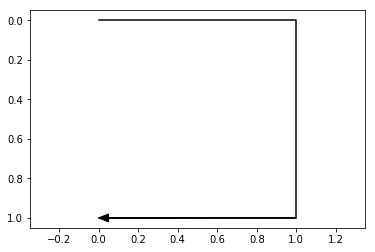

In [72]:
c = computeAllCoords( 1, sens='A', start='SO' )
print( c )
plt.plot( c[:, 0], c[:, 1], 'k' )
plt.arrow( c[-2, 0], c[-2, 1], (c[-1, 0]-c[-2, 0])*.95, (c[-1, 1]-c[-2, 1])*.95, head_width=0.04, head_length=0.05, fc='k', ec='k')
plt.axis('equal');
plt.gca().invert_yaxis();

In [68]:
c[:, 0]

array([0, 0, 1, 1])

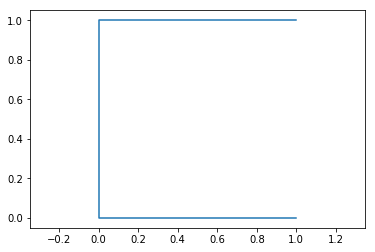

In [8]:
    nTot = 2**( 2 * level )
    quadrant = k/( nTot / 4 )  # division d'entier (floor?) , 0, 1, 2, 3

    
    kSuivant = k - quadrant* 4**(level-1)
    print( quadrant, k )
    
    sensSuivant = s[ sens ][ quadrant ]
    newStart = nStart[start][ quadrant ]
    
    i, j = getCoordinates(kSuivant, level-1, sensSuivant, newStart)
    
    I = i + 2**(level-1)*coords[start][sens][quadrant][0]
    J = j + 2**(level-1)*coords[start][sens][quadrant][1]
    
    return I, J

NameError: name 'level' is not defined

## Generation avec L-system

    Alphabet : L, R
    Constantes : F, +, −
    Axiome : L
    Règles :
    L → –RF+LFL+FR−
    R → +LF−RFR−FL+ 
   
 F signifie « avance », + signifie « à gauche 90° », et − signifie « à droite 90° ».

In [166]:
code = 'L'

In [187]:
code = code.replace('R', 'b') # buffer
code = code.replace('L', '-RF+LFL+FR-')
code = code.replace('b', '+LF-RFR-FL+')

print( code )
print( len(code) )

-+-+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+F+-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-F-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-+F+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+-F-+-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-F-+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+F+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+-F-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-+F+-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-F-+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+F+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+-F-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-+-F-+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+F+-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-F-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-+F+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+-+F+-+-+LF-RFR-FL+F+-RF+LFL+FR-F-RF+LFL+FR-+F+LF-RFR-FL+-F-+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F-RF+LFL+FR-+F+-RF+LFL+FR-F-+LF-RFR-FL+F+LF-RFR-FL+-F

In [188]:
def integre( code ):
    coords = [ np.array([0, 0]) ]
    direction = np.array( [0,1 ] )
    
    for lettre in code:
        if lettre == 'F':
            new_coord = coords[-1] + direction
            coords.append( new_coord  )
        elif lettre == '-':
            direction = tourne( direction, 'droite' )
        elif lettre == '+':
            direction = tourne( direction, 'gauche' )
            
    return np.array( coords )

In [189]:
def tourne( direction, sens ):
    new_dir = np.array( [ -direction[1] , direction[0] ] )
    if sens == 'droite':
        direction = new_dir
    elif sens == 'gauche':
        direction = - new_dir
    return direction

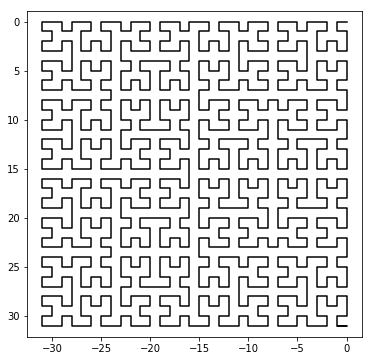

In [193]:
c = integre( code )

plt.figure( figsize=(6, 6) )
plt.plot( c[:, 0], c[:, 1], 'k' )
plt.arrow( c[-2, 0], c[-2, 1], (c[-1, 0]-c[-2, 0])*.95, (c[-1, 1]-c[-2, 1])*.95, head_width=0.04, head_length=0.05, fc='k', ec='k')
plt.axis('equal');
plt.gca().invert_yaxis();